In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
raw_data = pd.read_csv("Women's Ecommerce Data (With Sentiment Scores).csv")
raw_data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Sentiment,Title Sentiment
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.999423,NaN
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.999910,NaN
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,-0.999981,-0.999869
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.998425,0.999400
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.999157,0.639610


In [96]:
class_df = raw_data[['Clothing ID', 'Division Name', 'Department Name', 'Class Name']]
class_df = class_df[~class_df['Clothing ID'].duplicated()]
class_df = class_df.sort_values(by='Clothing ID')

class_dummies = pd.get_dummies(class_df[['Division Name', 'Department Name', 'Class Name']])
class_df = pd.concat((class_df, class_dummies), axis=1)
class_df = class_df.drop(['Division Name', 'Department Name', 'Class Name'], axis=1)
class_df.head()

,Clothing ID,Division Name_General,Division Name_General Petite,Division Name_Initmates,Department Name_Bottoms,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,Department Name_Tops,Department Name_Trend,...,Class Name_Legwear,Class Name_Lounge,Class Name_Outerwear,Class Name_Pants,Class Name_Shorts,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend
14746,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
22742,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
876,2,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16384,3,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
29,4,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [97]:
def age_classify(x):
    if x < 20:
        return "age_0_19"
    if x >= 20 and x < 30:
        return "age_20_29"
    if x >= 30 and x < 40:
        return "age_30_39"
    if x >= 40 and x < 50:
        return "age_40_49"
    if x >= 50 and x < 60:
        return "age_50_59"
    if x >= 60 and x < 70:
        return "age_60_69"
    if x >= 70 and x < 80:
        return "age_70_79"
    if x >= 80 and x < 90:
        return "age_80_89"
    if x >= 90:
        return "age_90_above"

age_df = raw_data[['Clothing ID', 'Age']]
age_df['Age Class'] = raw_data['Age'].apply(age_classify)

age_dummies = pd.get_dummies(age_df['Age Class'])

age_df = pd.concat((age_df, age_dummies), axis=1)
age_df = age_df.drop(['Age', 'Age Class'], axis=1)
age_df = age_df.groupby('Clothing ID').sum().astype(int)
age_df['Total Reviews'] = age_df.sum(axis=1)
age_df = age_df.reset_index()
age_df.head()

,Clothing ID,age_0_19,age_20_29,age_30_39,age_40_49,age_50_59,age_60_69,age_70_79,age_80_89,age_90_above,Total Reviews
0,0,0,1,0,0,0,0,0,0,0,1
1,1,0,1,1,0,1,0,0,0,0,3
2,2,0,1,0,0,0,0,0,0,0,1
3,3,0,0,1,0,0,0,0,0,0,1
4,4,0,1,0,0,0,0,0,0,0,1


In [98]:
def sentiment_classify(x, name):
    if x <= 0:
        return 'Negative ' + name
    if x > 0:
        return 'Positive ' + name

sentiment_df = raw_data[['Clothing ID', 'Review Sentiment', 'Title Sentiment']]
sentiment_df['Review Polarity'] = sentiment_df['Review Sentiment'].apply(lambda x : sentiment_classify(x, "Review"))
sentiment_df['Title Polarity'] = sentiment_df['Title Sentiment'].apply(lambda x : sentiment_classify(x, "Title"))

polarity_dummies = pd.get_dummies(sentiment_df[['Review Polarity', 'Title Polarity']], prefix="")
sentiment_df = pd.concat((sentiment_df, polarity_dummies), axis=1)
sentiment_df = sentiment_df.drop(['Review Polarity', 'Title Polarity'], axis=1)
sentiment_df = sentiment_df.groupby('Clothing ID').agg({'Review Sentiment':'mean', 
                                                         'Title Sentiment':'mean', 
                                                         '_Negative Review':'sum', 
                                                         '_Positive Review':'sum', 
                                                         '_Negative Title':'sum', 
                                                         '_Positive Title':'sum', 
                                                         })
sentiment_df = sentiment_df.reset_index()
sentiment_df.head()

,Clothing ID,Review Sentiment,Title Sentiment,_Negative Review,_Positive Review,_Negative Title,_Positive Title
0,0,NaN,NaN,0.0,0.0,0,0.0
1,1,0.332933,0.348410,1.0,2.0,1,2.0
2,2,-0.999977,-0.981313,1.0,0.0,1,0.0
3,3,0.995050,NaN,0.0,1.0,0,0.0
4,4,0.999987,0.999113,0.0,1.0,0,1.0


In [103]:
rating_df = raw_data[['Clothing ID', 'Rating']]
rating_dummies = pd.get_dummies(rating_df['Rating'], prefix="rating")
rating_df = pd.concat((rating_df, rating_dummies), axis=1)

rating_df = rating_df.drop('Rating', axis=1)
rating_df = rating_df.groupby('Clothing ID').sum().astype(int)
rating_df = rating_df.reset_index()

rating_df.head()

,Clothing ID,rating_1,rating_2,rating_3,rating_4,rating_5
0,0,0,0,0,0,1
1,1,0,1,0,0,2
2,2,0,0,0,1,0
3,3,0,0,0,0,1
4,4,0,0,0,0,1


In [388]:
X = pd.merge(class_df, age_df, on='Clothing ID')
X = pd.merge(X, sentiment_df, on='Clothing ID')
X = pd.merge(X, rating_df, on='Clothing ID')
X = X.dropna()
X = X.set_index('Clothing ID')
X.head()

,Division Name_General,Division Name_General Petite,Division Name_Initmates,Department Name_Bottoms,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,Department Name_Tops,Department Name_Trend,Class Name_Blouses,...,Title Sentiment,_Negative Review,_Positive Review,_Negative Title,_Positive Title,rating_1,rating_2,rating_3,rating_4,rating_5
Clothing ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,1,0,0,0,0,...,0.348410,1.0,2.0,1,2.0,0,1,0,0,2
2,1,0,0,0,0,0,0,1,0,0,...,-0.981313,1.0,0.0,1,0.0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0.999113,0.0,1.0,0,1.0,0,0,0,0,1
5,1,0,0,0,0,0,0,1,0,0,...,0.995699,0.0,1.0,0,1.0,0,0,0,0,1
7,1,0,0,0,0,0,1,0,0,0,...,0.998185,0.0,1.0,0,1.0,0,0,0,0,1


In [389]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from IPython.display import clear_output

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

max_clusters = 50
K = range(1, max_clusters+1)

inertia = []
for k in K:
    clear_output(wait=True)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    print(k, "/ {} Complete".format(max_clusters))

50 / 50 Complete


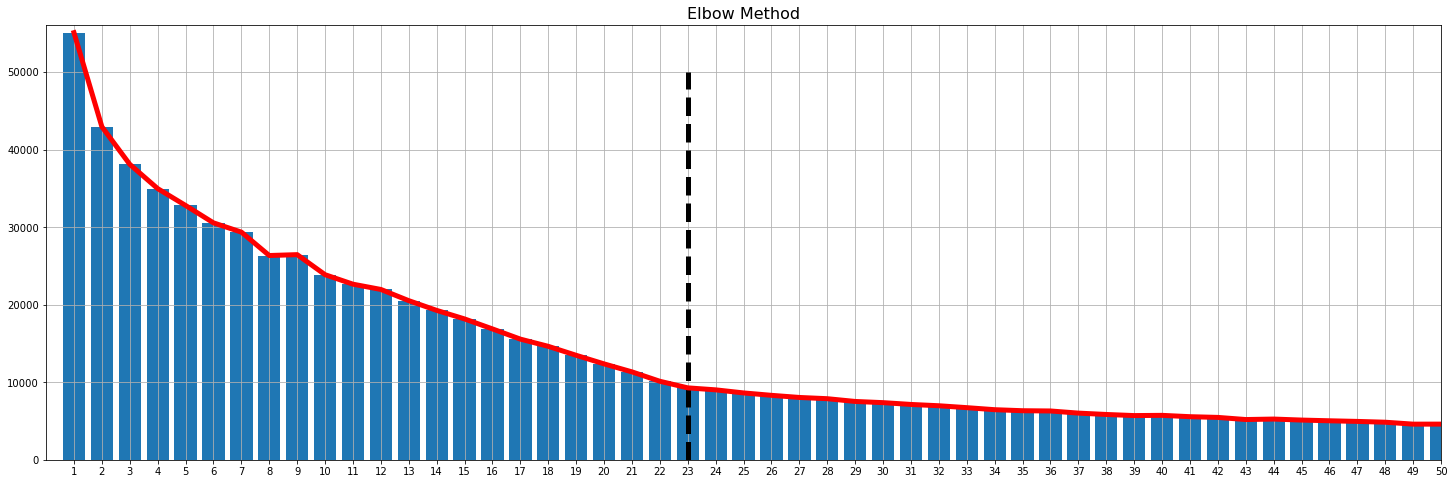

In [390]:
plt.figure(figsize=(25,8))
plt.plot(K, inertia, linewidth=5, color='red')
plt.bar(K, inertia)
plt.vlines(23, 0, 50000, linestyle='--', linewidth=5, color='black')
plt.xticks(K)
plt.xlim([0, max_clusters])
plt.ylim([0, np.max(inertia)+1000])
plt.title("Elbow Method", fontsize=16)
plt.grid()
plt.show()

Ideal number of clusters (by Elbow Method) :  **k = 23**.

In [200]:
k = 23

kmeans = KMeans(n_clusters=k)
kmeans.fit(X_scaled)
cluster_labels = kmeans.predict(X_scaled)

X['cluster'] = cluster_labels

# Get cluster column in front
cluster_col = X['cluster']
X.drop(labels=['cluster'], axis=1,inplace = True)
X.insert(0, 'cluster', cluster_col)
X = X.sort_values(by='cluster')
X

,cluster,Division Name_General,Division Name_General Petite,Division Name_Initmates,Department Name_Bottoms,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,Department Name_Tops,Department Name_Trend,...,Title Sentiment,_Negative Review,_Positive Review,_Negative Title,_Positive Title,rating_1,rating_2,rating_3,rating_4,rating_5
Clothing ID,,,,,,,,,,,,,,,,,,,,,
647,0,0,1,0,0,0,1,0,0,0,...,0.498292,1.0,3.0,1,3.0,1,0,0,0,3
1182,0,0,1,0,0,0,0,0,1,0,...,0.982472,0.0,1.0,0,1.0,0,0,0,0,1
869,0,1,0,0,0,0,0,0,1,0,...,0.548485,15.0,31.0,9,29.0,1,1,4,10,34
174,0,0,0,1,0,0,1,0,0,0,...,0.646036,1.0,0.0,0,1.0,0,0,1,0,0
559,0,1,0,0,0,0,0,0,0,1,...,-0.905726,1.0,0.0,1,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,22,0,0,1,0,0,1,0,0,0,...,0.998687,0.0,1.0,0,1.0,0,0,0,0,1
1149,22,0,1,0,0,1,0,0,0,0,...,0.993928,0.0,3.0,0,3.0,0,0,0,0,3
311,22,0,0,1,0,0,1,0,0,0,...,0.999689,0.0,1.0,0,1.0,0,0,0,0,1


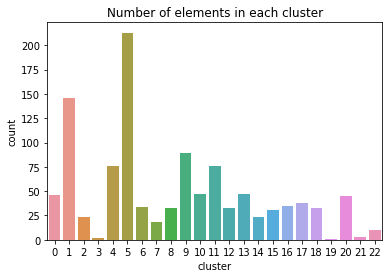

In [201]:
sns.countplot('cluster', data=X)
plt.title("Number of elements in each cluster")
plt.show()

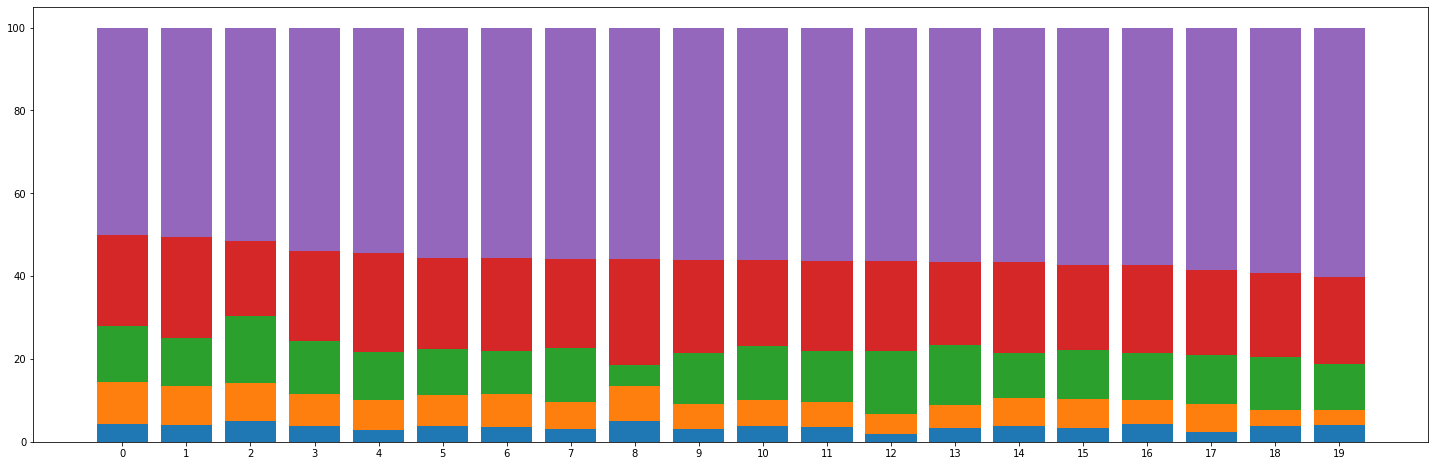

In [366]:
X_rating = X[['cluster','rating_1','rating_2','rating_3','rating_4','rating_5']]
cluster_rating = X_rating.groupby('cluster').mean()

for col in cluster_rating:
    cluster_rating[col+"_perc"] = cluster_rating[col] / cluster_rating.iloc[:,:5].sum(axis=1) * 100

# cluster_rating = cluster_rating.sort_values(by=['rating_1_perc', 'rating_2_perc', 'rating_3_perc', 'rating_4_perc', 'rating_5_perc'])
cluster_rating = cluster_rating.sort_values(by=['rating_5_perc'])

plt.figure(figsize=(25,8))
x = range(0, len(cluster_rating))

bottom = 0
plt.bar(x, height = cluster_rating['rating_1_perc'])

bottom += cluster_rating['rating_1_perc']
plt.bar(x, height = cluster_rating['rating_2_perc'], bottom=bottom)

bottom += cluster_rating['rating_2_perc']
plt.bar(x, height = cluster_rating['rating_3_perc'], bottom=bottom)

bottom += cluster_rating['rating_3_perc']
plt.bar(x, height = cluster_rating['rating_4_perc'], bottom=bottom)

bottom += cluster_rating['rating_4_perc']
plt.bar(x, height = cluster_rating['rating_5_perc'], bottom=bottom)

plt.xticks(x)
plt.show()

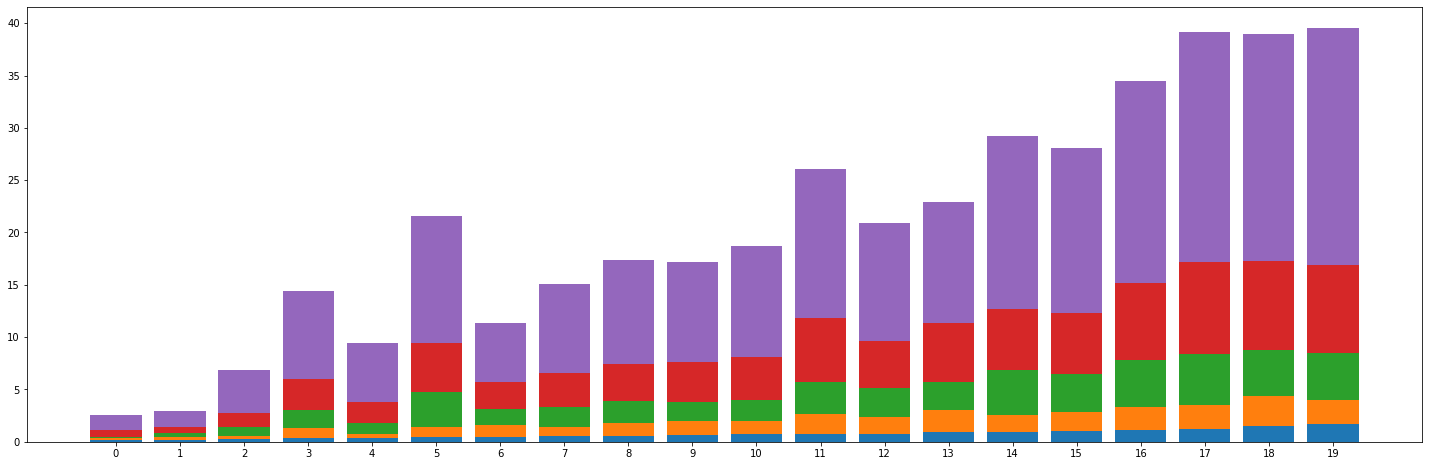

In [372]:
X_rating = X[['cluster','rating_1','rating_2','rating_3','rating_4','rating_5']]
cluster_rating = X_rating.groupby('cluster').mean()

for col in cluster_rating:
    cluster_rating[col+"_perc"] = cluster_rating[col] / cluster_rating.iloc[:,:5].sum(axis=1) * 100

# cluster_rating = cluster_rating.sort_values(by=['rating_1_perc', 'rating_2_perc', 'rating_3_perc', 'rating_4_perc', 'rating_5_perc'])
cluster_rating = cluster_rating.sort_values(by=['rating_1'])

plt.figure(figsize=(25,8))
x = range(0, len(cluster_rating))

bottom = 0
plt.bar(x, height = cluster_rating['rating_1'])

bottom += cluster_rating['rating_1']
plt.bar(x, height = cluster_rating['rating_2'], bottom=bottom)

bottom += cluster_rating['rating_2']
plt.bar(x, height = cluster_rating['rating_3'], bottom=bottom)

bottom += cluster_rating['rating_3']
plt.bar(x, height = cluster_rating['rating_4'], bottom=bottom)

bottom += cluster_rating['rating_4']
plt.bar(x, height = cluster_rating['rating_5'], bottom=bottom)

plt.xticks(x)
plt.show()

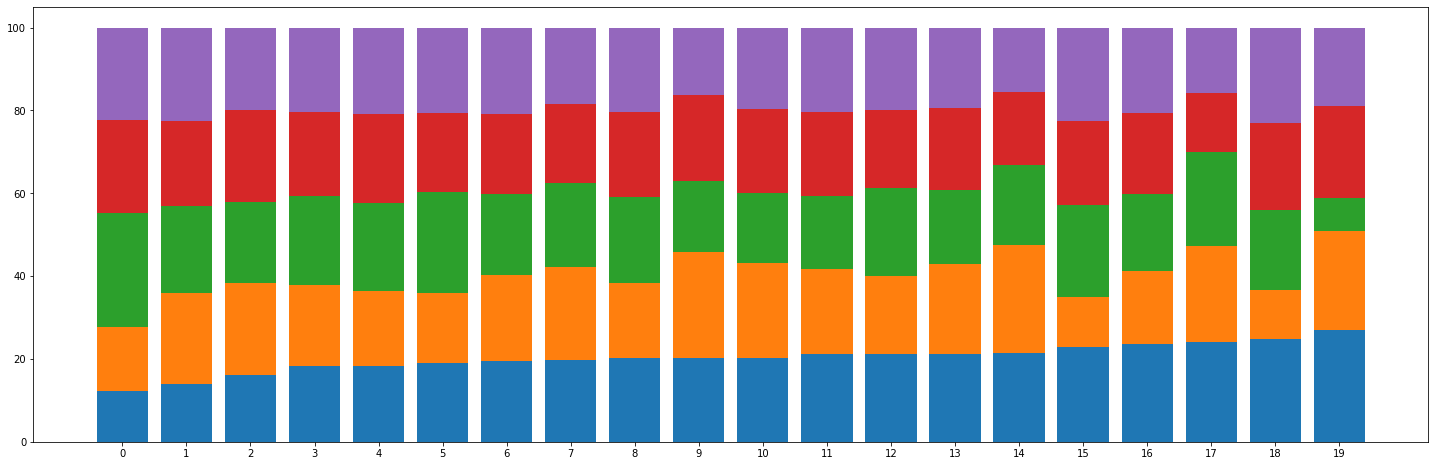

In [385]:
X_rating = X[['cluster','rating_1','rating_2','rating_3','rating_4','rating_5']]
cluster_rating = X_rating.groupby('cluster').sum()

cluster_rating = cluster_rating / cluster_rating.sum(axis=0) * 100

for col in cluster_rating:
    cluster_rating[col+"_perc"] = cluster_rating[col] / cluster_rating.iloc[:,:5].sum(axis=1) * 100

# cluster_rating = cluster_rating.sort_values(by=['rating_1_perc', 'rating_2_perc', 'rating_3_perc', 'rating_4_perc', 'rating_5_perc'])
cluster_rating = cluster_rating.sort_values(by=['rating_1_perc'])

plt.figure(figsize=(25,8))
x = range(0, len(cluster_rating))

bottom = 0
plt.bar(x, height = cluster_rating['rating_1_perc'])

bottom += cluster_rating['rating_1_perc']
plt.bar(x, height = cluster_rating['rating_2_perc'], bottom=bottom)

bottom += cluster_rating['rating_2_perc']
plt.bar(x, height = cluster_rating['rating_3_perc'], bottom=bottom)

bottom += cluster_rating['rating_3_perc']
plt.bar(x, height = cluster_rating['rating_4_perc'], bottom=bottom)

bottom += cluster_rating['rating_4_perc']
plt.bar(x, height = cluster_rating['rating_5_perc'], bottom=bottom)

plt.xticks(x)
plt.show()

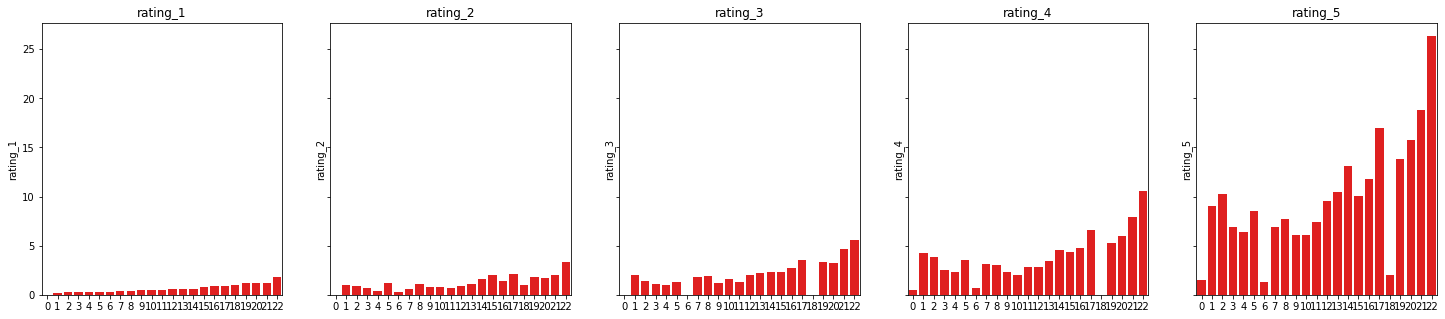

In [312]:
count_data = X_rating.groupby('cluster').mean().sort_values(by='rating_1').reset_index(drop=True)

fig, ax = plt.subplots(1,5, figsize=(25, 5), sharey=True)
for i, col in enumerate(count_data.columns):
    sns.barplot(x=count_data.index,y=col, data=count_data, ax=ax[i], color='red')
    ax[i].set_title(col)
plt.show()

#### Silhouette

In [314]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from IPython.display import clear_output
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

max_clusters = 50
K = range(2, max_clusters+1)

silhouette = []
for k in K:
    clear_output(wait=True)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    label = kmeans.predict(X_scaled)
    silhouette.append(silhouette_score(X_scaled, label))
    print(k, "/ {} Complete".format(max_clusters))

50 / 50 Complete


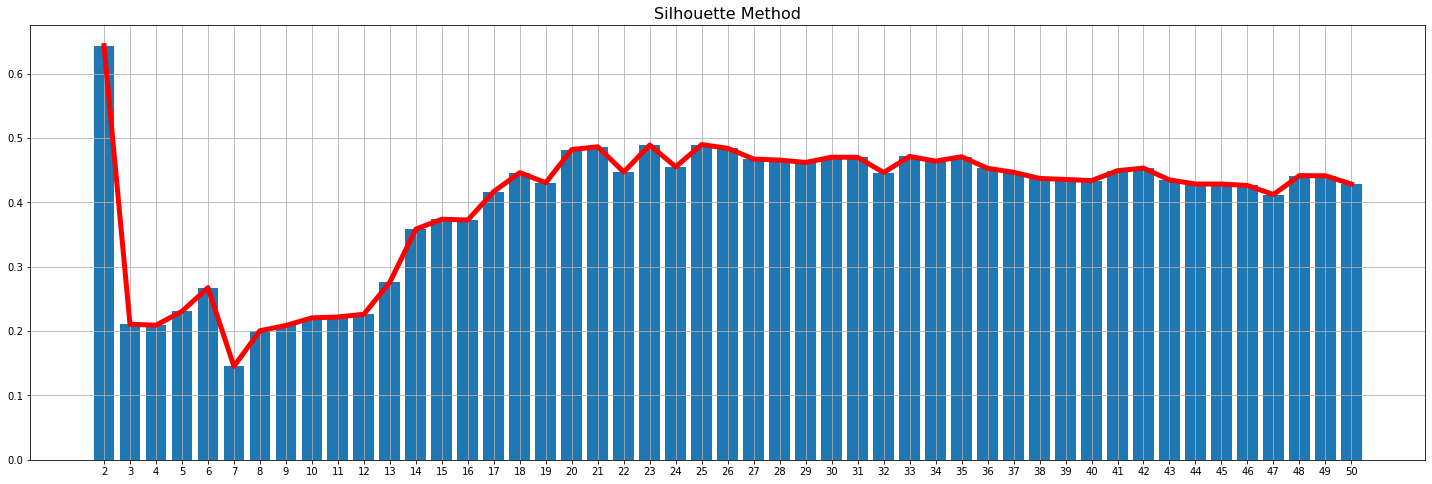

In [317]:
plt.figure(figsize=(25,8))
plt.plot(K, silhouette, linewidth=5, color='red')
plt.bar(K, silhouette)
# plt.vlines(23, 0, 50000, linestyle='--', linewidth=5, color='black')
plt.xticks(K)
# plt.xlim([0, max_clusters])
# plt.ylim([0, np.max(silhouette)+1000])
plt.title("Silhouette Method", fontsize=16)
plt.grid()
plt.show()

In [323]:
k = 20

kmeans = KMeans(n_clusters=k)
kmeans.fit(X_scaled)
cluster_labels = kmeans.predict(X_scaled)

X['cluster'] = cluster_labels

# Get cluster column in front
cluster_col = X['cluster']
X.drop(labels=['cluster'], axis=1,inplace = True)
X.insert(0, 'cluster', cluster_col)
X = X.sort_values(by='cluster')
X

,cluster,Division Name_General,Division Name_General Petite,Division Name_Initmates,Department Name_Bottoms,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,Department Name_Tops,Department Name_Trend,...,Title Sentiment,_Negative Review,_Positive Review,_Negative Title,_Positive Title,rating_1,rating_2,rating_3,rating_4,rating_5
Clothing ID,,,,,,,,,,,,,,,,,,,,,
993,0,0,1,0,1,0,0,0,0,0,...,0.609213,15.0,38.0,10,41.0,3,2,4,14,35
190,0,0,1,0,0,0,1,0,0,0,...,0.782995,2.0,6.0,1,7.0,0,0,2,1,5
653,0,0,0,1,0,0,1,0,0,0,...,0.955853,1.0,0.0,0,1.0,0,1,0,0,0
978,0,0,1,0,0,0,0,1,0,0,...,0.998889,1.0,1.0,0,1.0,0,1,0,0,1
473,0,0,1,0,1,0,0,0,0,0,...,0.995830,0.0,2.0,0,2.0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,19,0,0,1,0,0,1,0,0,0,...,0.993016,2.0,1.0,0,3.0,0,0,0,4,0
42,19,0,0,1,0,0,1,0,0,0,...,0.994709,0.0,2.0,0,2.0,0,0,0,0,3
296,19,0,0,1,0,0,1,0,0,0,...,0.999493,0.0,3.0,0,3.0,0,0,0,0,3


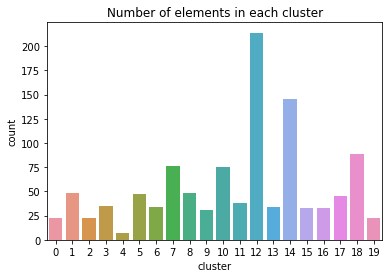

In [324]:
sns.countplot('cluster', data=X)
plt.title("Number of elements in each cluster")
plt.show()

In [325]:
X_rating = X[['cluster','rating_1','rating_2','rating_3','rating_4','rating_5']]

X_rating_melt = pd.melt(X_rating,
                        id_vars=['cluster'], 
                        value_vars=['rating_1','rating_2','rating_3','rating_4','rating_5'], 
                        var_name=['rating'],
                        value_name='count')

# plt.figure(figsize=(20,8))
# # sns.boxplot(x='cluster', data=X_rating, hue='cluster')
# sns.violinplot(x='cluster', y='count', hue='rating', data=X_rating_melt)
X_rating_melt

,cluster,rating,count
0,0,rating_1,3
1,0,rating_1,0
2,0,rating_1,0
3,0,rating_1,0
4,0,rating_1,0
...,...,...,...
5505,19,rating_5,0
5506,19,rating_5,3
5507,19,rating_5,3
5508,19,rating_5,1


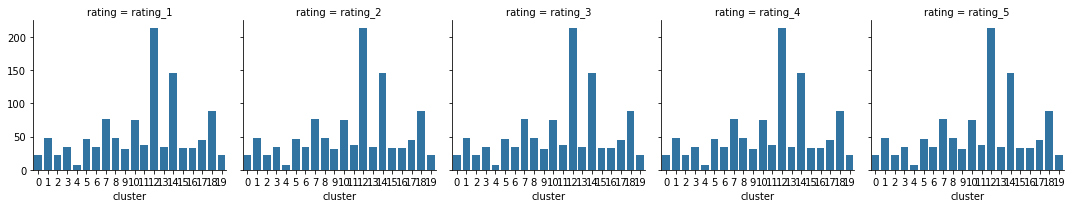

In [326]:
g = sns.FacetGrid(X_rating_melt, col="rating")
g.map(sns.countplot, 'cluster', data=X_rating_melt)

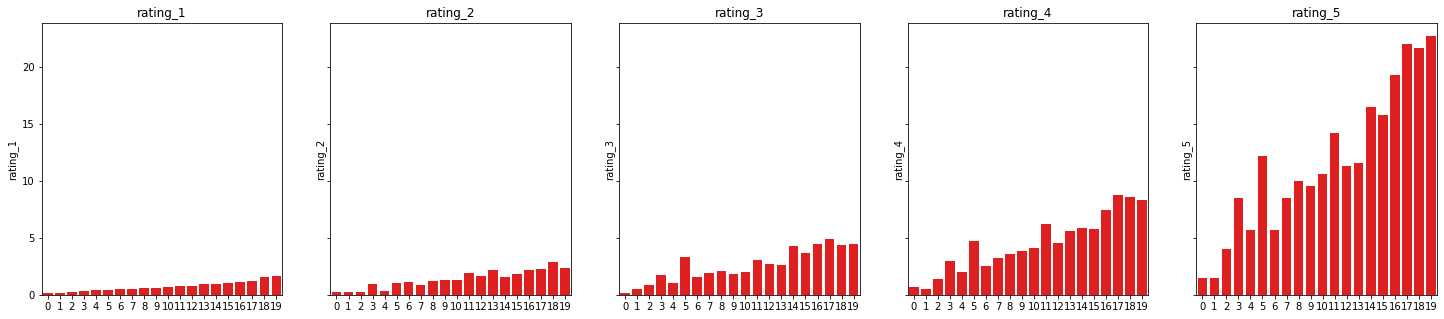

In [327]:
count_data = X_rating.groupby('cluster').mean().sort_values(by='rating_1').reset_index(drop=True)

fig, ax = plt.subplots(1,5, figsize=(25, 5), sharey=True)
for i, col in enumerate(count_data.columns):
    sns.barplot(x=count_data.index,y=col, data=count_data, ax=ax[i], color='red')
    ax[i].set_title(col)
plt.show()